# Homework 3: How similar is SARS-Cov-2 to other viruses?

Evolution is the process by which different living organisms are believed to have developed from earlier forms during the earth's history. The main component that evolves through time is the DNA which is passed on to the next generation. Genetic mutations, variation, and recombination are processes that modify DNA and cause variation in the population. The main drivers of evolution are natural selection and genetic drift that act on this variation. Through time, some characteristics become more common or rare in the population resulting in a change in heritable ones arising over successive generations.

Even though we do not consider viruses to be *living* organisms, they are still subject to evolution. Their genetic material undergoes the same transformations and selection, resulting in new variants and types of viruses.

<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Phylogenetic_tree.svg/800px-Phylogenetic_tree.svg.png" width="500">
</div>

Comparing the characteristics of different organisms allows us to estimate their evolutionary distance. We use genetic material as a proxy for these characteristics. We estimate evolutionary distance as the number of transformation events that would occur for one organism to become genetically identical. In practice, this means aligning genetic sequences and observing the number of transformation events. Performing multiple sequence alignment and calculating pairwise distances gives us a distance matrix.

One way of presenting the evolutionary distance between organisms is with a phylogenetic tree. Similar organisms are connected via their common ancestor, even though we do not have genetic data to prove their existence. However, these common ancestors likely existed in the past due to evolution. The most common algorithms for building phylogenetic trees are the UPGMA and Neighbor-Joining algorithms. Many frequentist and Bayesian variations of these are also available online.

Once we know the evolution of the virus, we can expand our knowledge about similar viruses to our virus of interest. Our task is implementing the neighbor-joining method, a plotting function, and constructing a phylogenetic tree of coronaviruses. In the last problem, we will see how recombination can seemingly contradict the flow of evolution.

In [1]:
import numpy as np
import pandas as pd
from Bio import Entrez
from Bio import SeqIO
import matplotlib.pyplot as plt
import random

In [2]:
# In order to import from the python file without hassle, we add the current
# directory to the python path
import sys; sys.path.append(".")
sys.path.append('../homework-2-matemato')

Let's let the nice folks at NCBI know who we are.

In [3]:
Entrez.email = "mm9520@student.uni-lj.si"

## Problem 1: Neighbor joining implementation

**Task:** Use the template `neighbor_joining` function in the file `helper_functions.py` and implement the neighbor-joining (NJ) algorithm for agglomerative phylogenetic clustering. Your implementation should return a `Node` object to construct a tree structure and return a root Node. Use provided classes and add code where needed. Stick to the provided structure and test your solution with added unit tests. Provided unit tests do not test the correctness of your implementation but only the structure of your output.

**Implementation requirement:** In theory, the neighbor-joining algorithm results in an unrooted tree. But for plotting and later rooting the tree, your implementation should return a root node. In the last iteration of the NJ, the algorithm joins the final two nodes by creating a root node and setting the distance to each of the remaining nodes as half of the distance between them.

**[10 points]**

## Problem 2: Plotting a phylogenetic tree

**Task:**
Use the template `plot_nj_tree` function in the file `helper_functions.py` to write a plotting function using the `matplotlib` library.
The only limitation is to use the template function and two required inputs. How you position a dendrogram, colour the plot, ids and everything else is up to you.

Leaves in a dendrogram are connected via horizontal and vertical lines. Horizontal lines represent genetic distance, while vertical ones present divergence of the last common ancestor. Below is an example of a dendrogram. Leaves do not align on a vertical line as with hierarchical clustering.

<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/d/dd/Phylogenetic_tree_of_coronaviruses.jpg" width="500">
</div>

*(Patrick C. Y. Woo, Yi Huang, Susanna K. P. Lau, and Kwok-Yung Yuen, [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/deed.en) )*

Test your implementation to our provided unit tests by comparing your output plot to the ground truth in `tests/test_plotting_dendrogram.png`. Write your own tests as well.

**[10 points]**

## Problem 3: Phylogenetic analysis of coronavirus

You obtained 31 aligned sequences of different coronaviruses collected at multiple time points worldwide. We used the Clustal algorithm to provide you with a multiple sequence alignment (MSA) file in `data/clustal_MSA_coronavirus.fasta`. Each entry has a form `name|accession`.

We will use Hamming distance to calculate genetic distance from pairwise sequence alignment. This naive approach estimates the distance by counting the number of mismatches in the alignment. For example, alignment *"ATC"* and *"ATT"* will have a distance of 1 while *"AT-C"* and *"CTTC"* will have a distance of 2. There are more sophisticated approaches to evolutionary distance estimation, but for our use case, Hamming distance will suffice.

Plot a phylogenetic tree of coronaviruses using your implementation of `neighbor_joining` and `plot_nj_tree`.
Compare your results to the ones found on [Wikipedia](https://en.wikipedia.org/wiki/Coronavirus). Note that three additional viruses in our alignment file do not appear in the figure.

You might notice your figure differs from the one on Wikipedia. Neighbor-joining results in an unrooted or poorly rooted tree at best. Biologists developed a cleaver approach to determine the root of a neighbor-joining tree by including one distant relative species in the alignment, called the outgroup. In the course of evolution, a distance relative diverged first. We can determine the midpoint between the outgroup and the rest of the phylogenetic tree as a root. This approach proclaims the root node as the last common ancestor between all species in the tree. We will be using the *Breda virus* as an outgroup.

Order in a dendrogram can give an impression of a nicer plot. We can achieve this by setting the left child as the one with fewer leaf nodes in a subtree.

As a final step, fetch NCBI annotations to determine their coronavirus group. Present those groupings on your figure with colors.

**Task:** Plot the most informative phylogenetic tree by iteratively improving your implementation.

**a)** Calculate pairwise distances of aligned sequences using Hamming distance.
Construct and plot the phylogeny dendrogram using your implementations of neighbor-joining and plotting algorithm in `helper_functions`. **[4 points]**

**b)** Implement `reroot_tree` function in the `helper_function`. Use it to reroot a tree using the *Breda virus* as an outgroup. Make sure you add a new root node and remove the previous root node from a tree. **[+2 points]**

**c)** Implement `sort_children_by_leaves` function in the `helper_function`. Use it to sort child nodes by assigning a lower index to children with fewer leaf nodes in their subtree. **[+2 points]**

**d)** Use color and labeling to show four major groups of coronaviruses. You can find the type of coronavirus in the NCBI annotations under the *taxonomy* field. **[+2 points]**

Save your final figure in `problem3.png`. Write your comments in `phylogeny_comments` variable. Are coronavirus groups well separated? Which group does SARS-CoV-2 belong to?

We will feature the best figures in front of the class in a feedback session.

If you allow us to feature your plot, set the variable `use_my_plot` to `"yes"`.

In [4]:
from helper_functions import plot_nj_tree
from helper_functions import reroot_tree
from helper_functions import Node
from helper_functions import sort_children
from helper_functions import neighbor_joining

In [5]:
# records = SeqIO.read("./data/clustal_MSA_coronavirus.fasta", "fasta")
records = list(SeqIO.parse("./data/clustal_MSA_coronavirus.fasta", "fasta"))
n = len(records)

In [6]:
sequences = []
ids = []
for r in records:
    sequences.append(r.seq)
    ids.append(r.id.split("|")[0])

In [7]:
viruses = {}
for r in records:
    with Entrez.efetch(db="nucleotide", id=r.id.split("|")[1], rettype="gbwithparts", retmode="text") as handle:
        viruses[r.id.split("|")[0]] = SeqIO.read(handle, "genbank")
for key, value in viruses.items():
    for type in value.annotations['taxonomy']:
        if "corona" in type: viruses[key] = type
viruses['Breda'] = "Unknown"

In [8]:
colors =['#5cb7aa', '#fff1a8','#fece7c', '#fa9b58', '#d0384e']
for k,v in viruses.items():
    if viruses[k] == 'Unknown': viruses[k] = colors[0]
    if viruses[k][0] == 'A': viruses[k] = colors[1]
    if viruses[k][0] == 'B': viruses[k] = colors[2]
    if viruses[k][0] == 'D': viruses[k] = colors[3]
    if viruses[k][0] == 'G': viruses[k] = colors[4]

In [9]:
def change_ids(node, ids):
    if node.left is None or node.right is None: 
        node.id = ids[int(node.id)]
        return
    change_ids(node.left, ids)
    change_ids(node.right, ids)
    return

def hamming_distance(a,b):
    return sum([1 for i,c in enumerate(a) if c != b[i]])

distance_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i < j: distance_matrix[i,j] = hamming_distance(sequences[i], sequences[j])

distance_matrix = np.where(distance_matrix,distance_matrix,distance_matrix.T)

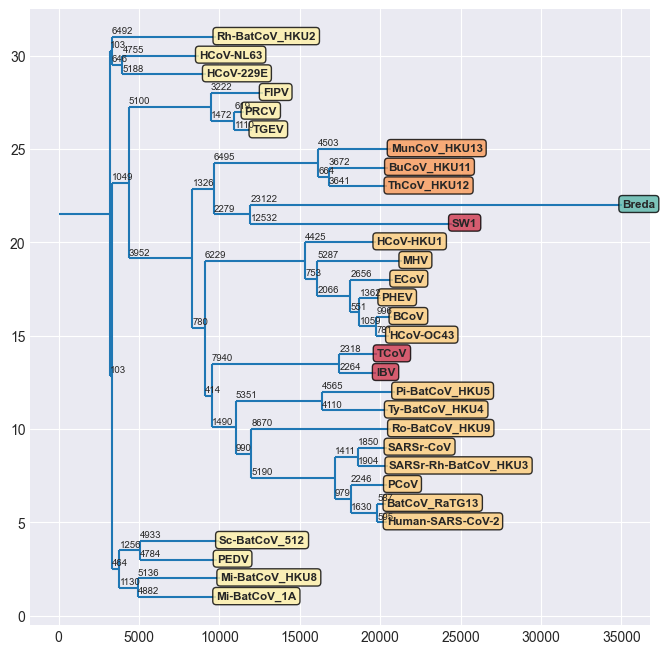

In [10]:
nj = neighbor_joining(distance_matrix)
change_ids(nj, ids)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plot_nj_tree(nj, ax, viruses)

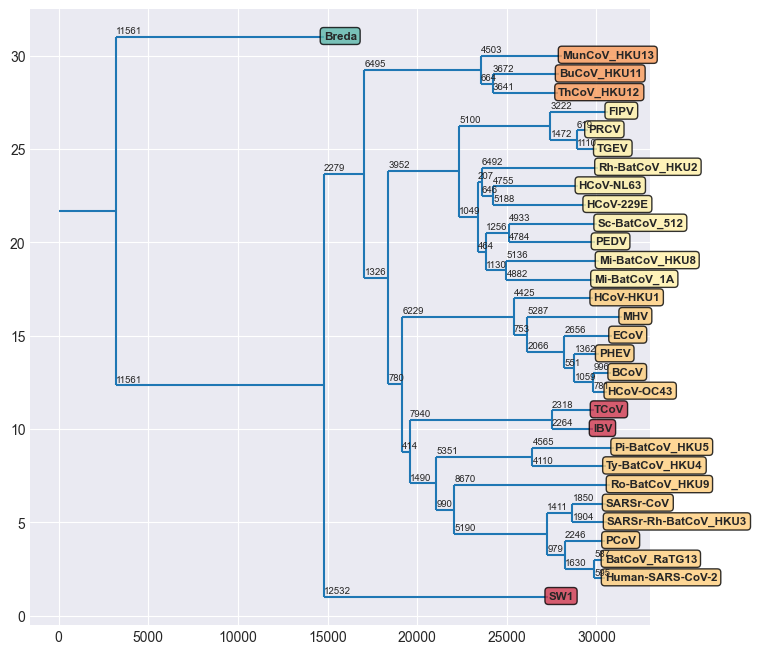

In [11]:
nj_rerooted = reroot_tree(nj, Node(ids[0], None, 0, None, 0, None))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plot_nj_tree(nj_rerooted, ax, viruses)

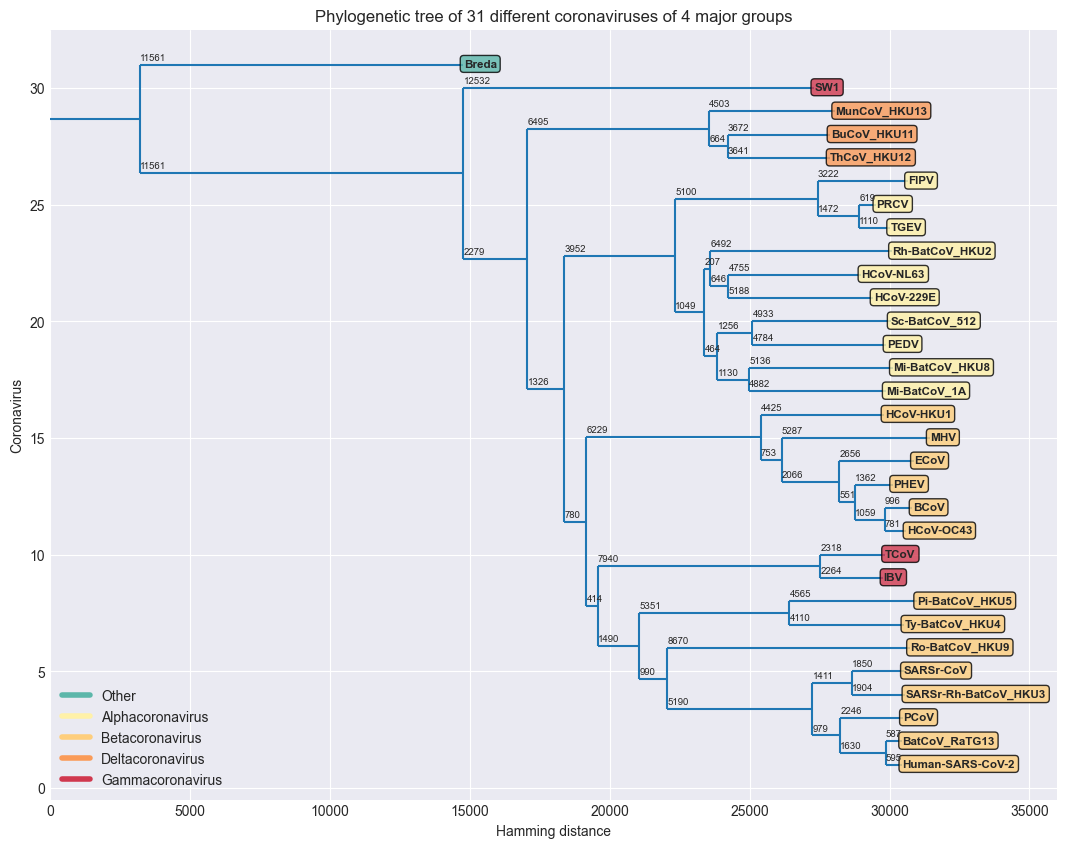

In [12]:
from matplotlib.lines import Line2D
plt.style.use('seaborn-darkgrid')
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4),
                Line2D([0], [0], color=colors[4], lw=4)]


sort_children(nj_rerooted)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 10))
ax.set_xlim(0, 36000)
ax.set_title("Phylogenetic tree of 31 different coronaviruses of 4 major groups")
ax.set_xlabel("Hamming distance")
ax.set_ylabel("Coronavirus")
plot_nj_tree(nj_rerooted, ax, viruses)
ax.legend(custom_lines, ["Other", "Alphacoronavirus", "Betacoronavirus", "Deltacoronavirus", "Gammacoronavirus"], loc='lower left')
# fig.savefig("problem3.png", dpi=500, bbox_inches="tight")

In [13]:
phylogeny_comments = """Coronaviruses get really nicely separated even with a simple distance such as hamming distance. The only "outlier" is SW1 which belongs to Gammmacoroviruses.
Human-SARS-CoV-2 belongs to Betacoronaviruses and is closest to BatCoV_RaTG13 according to our phylogenetic tree.
"""

In [14]:
use_my_plot = "yes" # type "yes" if you allow your plot to be featured in a feeback session

## Problem 4: Recombination

We tend to think of evolution as a hierarchical process: we have some common ancestor that split into several sub-species through a series of random mutations. However, nothing is that straightforward in biology. There have been well-documented cases of horizontal gene transfer in nature where organisms swap entire chunks of DNA with each other. In viruses, something similar can happen as well. When a cell is infected with multiple virions (potentially different strains of the same virus), a *recombination event* can occur. Recombination occurs during the DNA copying process when, for whatever reason, the copier swaps out the virus template midway with a different template. For instance, we could start copying virus A, and then midway, the copier will switch to virus B, effectively resulting in new virus DNA that has DNA from both viruses A and B.

During the start of the global pandemic, there was much confusion about the origins of SARS-CoV-2. We initially thought it came from bats. Then, at some point, people noticed that a critical piece of the spike protein -- the receptor binding domain (RBD) -- was more similar to the sequence of pangolin coronaviruses. This evidence points to recombination. Before the virus jumped to humans, there must have been some host infected with both the Bat RaTG13 coronavirus and the Pangolin coronavirus where this recombination happened.

In this problem, we will look at the spike protein, look at the receptor binding domain, and check this evidence for recombination ourselves.

**Task**:
Find the spike proteins of the three viruses and align the sequences with each other using your global alignment implementation from the previous homework. Since we're comparing the differences between the bat and pangolin coronaviruses to the human virus, we only need to compute two alignments: human to bat and human to pangolin. We will then compare the differences between the two alignments. Find the RBD of SARS-CoV-2  using the [NCBI graphical view of the SARS-CoV-2 genome](https://www.ncbi.nlm.nih.gov/projects/sviewer/?id=NC_045512&tracks=[key:sequence_track,name:Sequence,display_name:Sequence,id:STD649220238,annots:Sequence,ShowLabel:false,ColorGaps:false,shown:true,order:1][key:gene_model_track,name:Genes,display_name:Genes,id:STD3194982005,annots:Unnamed,Options:ShowAllButGenes,CDSProductFeats:true,NtRuler:true,AaRuler:true,HighlightMode:2,ShowLabel:true,shown:true,order:9]&v=1:29903&c=null&select=null&slim=0) and look at the aminoacid similarity inside and outside the RBD. Similarly to the original publication, we will use a sliding window approach to calculate the similarity between sequences. Calculate the average number of matching amino acids for each window location in the alignment and plot the resulting similarity sequence. A window size of 100 is a good starting point. Perform this sliding window approach for both alignments and plot both similarity sequences in a single figure. Which coronavirus is more similar to SARS-CoV-2 in the RBD, and which is more similar outside the RBD? Create a visualization similar to the one in Fig. 2a from [the original Nature paper](https://www.nature.com/articles/s41586-020-2169-0)
to compare the human-to-bat and the human-to-pangolin alignments. Save your visualization to `recombination.png` and write down the mismatch rates and your comments/findings into `recombination_comments`.

**[10 points]**

Here are some things you may want to think about. Looking at your visualization, are there other regions in the spike gene (or elsewhere in the genome) that could be due to recombination? Could there be any alternative explanation for the differences in these regions?

In [15]:
three_viruses = {"covid": "NC_045512", "bat": "MN996532", "pangolin": "MT121216", "pangolin2": "MT072864.1"}
sequences = {}
for k,v in three_viruses.items():
    with Entrez.efetch(db="nucleotide", id=v, rettype="gbwithparts", retmode="text") as handle:
        sequences[k] = SeqIO.read(handle, "genbank")

In [16]:
spikes_nucleotide = {}
for key, value in sequences.items():
    for f in sequences[key].features:
        if f.type == 'CDS':
            try:
                if f.qualifiers['product'][0] == "spike protein" or f.qualifiers['gene'][0] == 'S': spikes_nucleotide[key] = f
            except:
                pass

spikes_aminoacids = {key: sequences[key].seq[value.location._start:value.location._end].translate() for key,value in spikes_nucleotide.items()}

In [17]:
from Bio.Align import substitution_matrices
from helper_functions2 import global_alignment

sub_matrix = substitution_matrices.load("BLOSUM62")

ch = ["A", "R",  "N",  "D",  "C",  "Q",  "E",  "G",  "H",  "I",  "L",  "K",  "M" , "F",  "P",  "S",  "T",  "W",  "Y", "V",  "B",  "Z",  "X",  "-"]
ch = {i: letter for i, letter in enumerate(ch)}
all_possibilities = {(ch[l1], ch[l2]): sub_matrix[l1][l2] for l1 in range(sub_matrix.shape[0]) for l2 in range(sub_matrix.shape[1])}
l = lambda x,y: all_possibilities[x,y]

In [18]:
covid_1, bat, s = global_alignment(spikes_aminoacids['covid'][:-1], spikes_aminoacids['bat'][:-1], l)
covid_2, pangolin, s = global_alignment(spikes_aminoacids['covid'][:-1], spikes_aminoacids['pangolin'][:-1], l)

In [19]:
def similarity(a,b):
    return sum([1 for i in range(len(a)) if a[i] == b[i]])

def sliding_window_similarity(seq1, seq2, n):
    return [similarity(seq1[i-n:i], seq2[i-n:i])/n for i in range(n, len(seq1)+1)]

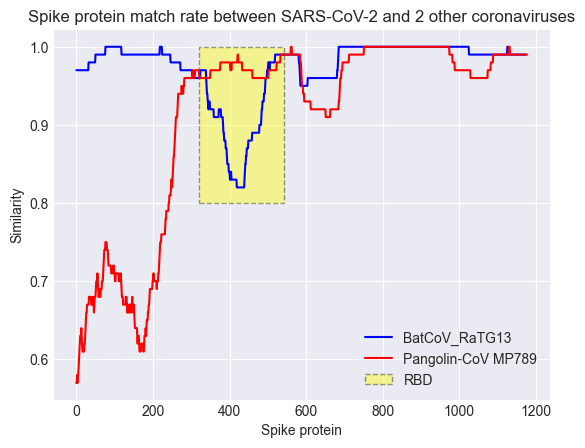

In [20]:
RBD_start = 319
RBD_end = 541

sim_1 = sliding_window_similarity(covid_1, bat, 100)
sim_2 = sliding_window_similarity(covid_2, pangolin, 100)

plt.plot(sim_1, label="BatCoV_RaTG13", color="blue")
plt.plot(sim_2, label="Pangolin-CoV MP789", color="red")
RBD_area = plt.Rectangle((RBD_start,0.8), RBD_end-RBD_start, 0.2, fc='yellow', alpha=0.4, linestyle = 'dashed', ec='black', label="RBD")
plt.gca().add_patch(RBD_area)
plt.xlabel("Spike protein")
plt.ylabel("Similarity")
plt.title("Spike protein match rate between SARS-CoV-2 and 2 other coronaviruses")
plt.legend()
plt.savefig("recombination.png", dpi=500, bbox_inches="tight")

In [21]:
recombination_comments = """In the plot we see that that SARS-CoV-2 spike protein is really similar to BatCoV_RaTG13 spike protein. We also observe ambiguity in the RBD region, 
where Pangolin-CoV MP789 spike protein is more similar to SARS-CoV-2 spike protein than BatCoV_RaTG13 protein is.
"""

## Bonus 1: Bootstrap confidence

We performed an alignement, calulated pairwise distances and built a phylogenetic tree. Are we confident in our phylogenetic tree? The answer is, we don't know, because we never estimated the uncertainty of our solution.

In 1985, Joseph Felsenstein wrote an [article](https://pubmed.ncbi.nlm.nih.gov/28561359/) on estimating confidence limits of phylogenetic trees using a non-parametric bootstrap. It stands from the idea of creating bootstrap versions of alignment and building alternative phylogenetic trees. A confidence in a clade is then represented as a proportion of alternative trees that contain the same clade.

To generate a bootstrap version of alignment with length $N$, we sample $N$ alignment positions with replacement. Rearanging sequences accoring to a sequence of sampled indicies give us an alternative alignment. Based on new alignment we calculate the distance and apply neighbor joining algorithm to get an alternative tree.

Here we define a clade equivalence:
*Let $L$ be a set of leaf nodes in a clade from original tree and $L'$ be a set of leaf nodes in a clade from alternative tree. Let $L_1$ and $L_2$ be sets of leaf nodes of both children of a clade, such that $L = L_1 \bigcup L_2$. A clade of an alternative tree is considered the same if and only if $L_1 \bigcap L_1' = \emptyset\;\land\;L_2 \bigcap L_2'=\emptyset$ or $L_1 \bigcap L_2' = \emptyset\;\land\;L_2 \bigcap L_1'=\emptyset$.*

You are now given a Clustal mutliple sequence alignment of spike proteins from the same coronavirses as before. The alignment is store in `data/clustal_MSA_coronavirus_spike.fasta`. Again use Hamming distance for calculating distance and Breda virus as an outgroup.

**Task:** Construct a phylogenetic tree from spike protein MSA and use the bootstrap method for estimating confidence of each clade. Plot the phylogenetic tree and add confidence estimates on the plot.

**a)** Construct 100 alternative trees from bootstraped coronavirus alignments. Make sure you root your trees before estimating confidence.

**b)** Write a function to find a clade from the original tree in an alternative tree.

**c)** Calculate and asign confidence value of a clade to an attribute `Node.confidence`. Note that leaf nodes always have confidence 1.

**d)** Plot the phylogeny tree with confidence estimates using the same plotting function `plot_nj_tree` as in Problem 3. Do not plot confidence of leaf nodes.

Save your plot into `confidence_tree.png`.
Write your comments in `confidence_comments` variable. How does the phylogenetic tree compares to the one from Problem 3? Which part of the phylogenetic tree are we the least confident in?

**[5 points]**

In [22]:
def hamming_distance(a,b):
    return sum([1 for i,c in enumerate(a) if c != b[i]])

def change_ids(node, ids):
    if node.left is None or node.right is None: 
        node.id = ids[int(node.id)]
        return
    change_ids(node.left, ids)
    change_ids(node.right, ids)
    return

def change_ids_advanced(node, id):
    if node.left is None or node.right is None: return
    node.id = id
    change_ids_advanced(node.left, id+'l')
    change_ids_advanced(node.right, id+'r')
    return

def find_node(tree, id):
    if tree is None: return None
    if tree.id == id: return tree
    l = find_node(tree.left, id)
    r = find_node(tree.right, id)
    return l if l is not None else r

def find_leaves(tree, leaves):
    if tree.left is None and tree.right is None:
        leaves.append(tree.id)
        return set(leaves)
    find_leaves(tree.left, leaves)
    find_leaves(tree.right, leaves)
    return set(leaves)

def criteria(L1, L2, L1_, L2_):
   if L1.union(L2) == L1_.union(L2_) and ((L1.intersection(L1_) == set([]) and L2.intersection(L2_) == set([])) or (L1.intersection(L2_) == set([]) and L2.intersection(L1_) == set([]))): return True

def insert_confidence(real_tree, alternative_trees):
    if real_tree.left is None and real_tree.right is None:
        real_tree.confidence = 100
        return
    L1 = find_leaves(real_tree.left, [])
    L2 = find_leaves(real_tree.right, [])
    confidence = 0
    for fake_tree in alternative_trees:
        L_ = find_node(fake_tree, real_tree.id)
        if L_ is None: continue
        L1_ = find_leaves(L_.left, [])
        L2_ = find_leaves(L_.right, [])
        if criteria(L1, L2, L1_, L2_): confidence += 1
            
    real_tree.confidence = confidence
    insert_confidence(real_tree.left, alternative_trees)
    insert_confidence(real_tree.right, alternative_trees)

In [23]:
records_spike = list(SeqIO.parse("./data/clustal_MSA_coronavirus_spike.fasta", "fasta"))
n = len(records_spike)

In [24]:
sequences_spike = []
ids = []
for r in records_spike:
    sequences_spike.append(r.seq)
    ids.append(r.id.split("|")[0])

In [25]:
distance_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i < j: distance_matrix[i,j] = hamming_distance(sequences_spike[i], sequences_spike[j])

distance_matrix = np.where(distance_matrix,distance_matrix,distance_matrix.T)

nj = neighbor_joining(distance_matrix)
change_ids(nj, ids)
real_tree = reroot_tree(nj, Node(ids[0], None, 0, None, 0, None))
sort_children(real_tree)
change_ids_advanced(real_tree, '')

In [26]:
alternative_trees = []
sequences_spike = np.array(sequences_spike)

for tree_i in range(100):
    indices = np.array(random.choices(range(len(sequences_spike[0])), k=len(sequences_spike[0])))
    mixed_sequences = ["".join(r[indices]) for r in sequences_spike]

    distance_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i < j: distance_matrix[i,j] = hamming_distance(mixed_sequences[i], mixed_sequences[j])

    distance_matrix = np.where(distance_matrix,distance_matrix,distance_matrix.T)

    nj = neighbor_joining(distance_matrix)
    change_ids(nj, ids)
    nj_rerooted = reroot_tree(nj, Node(ids[0], None, 0, None, 0, None))
    sort_children(nj_rerooted)
    change_ids_advanced(nj_rerooted, '')
    alternative_trees.append(nj_rerooted)
    
insert_confidence(real_tree, alternative_trees)

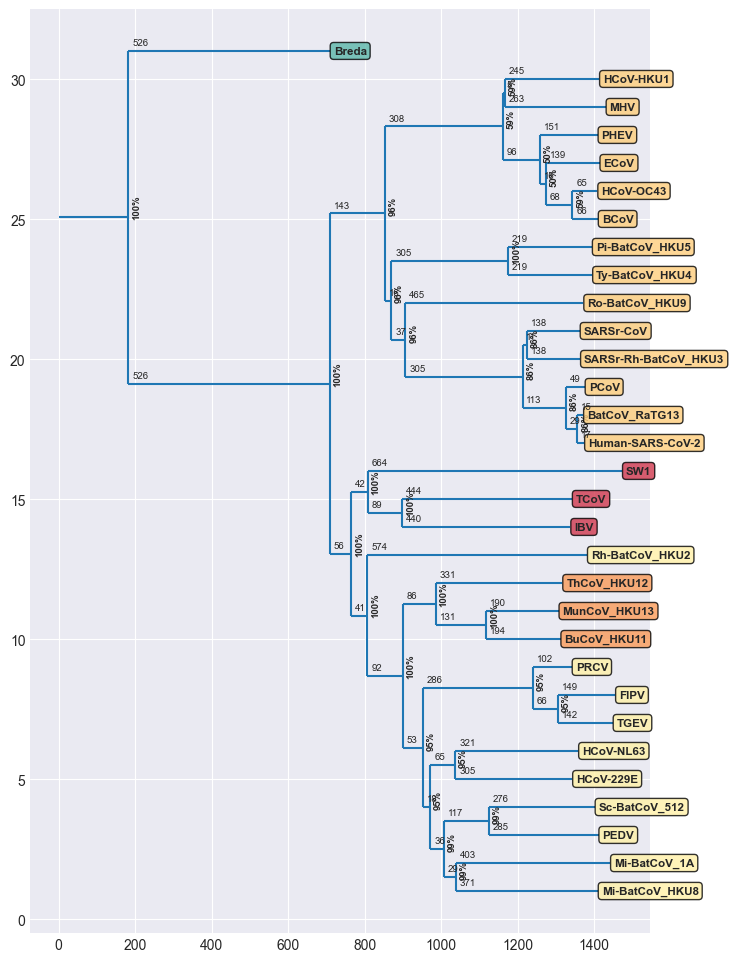

In [27]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 12))
plot_nj_tree(real_tree, ax, viruses)
# fig.savefig("confidence_tree.png", dpi=500, bbox_inches="tight")

In [28]:
confidence_comments = """The phylogenetic tree is similar to the one from problem 3, but a bit more accurately grouped. 
I think that the Betacoronaviruses have the least confidence, particularly the upper part on the plot.
"""

## Bonus 2: Radial dendrogram

Use the template `plot_nj_tree_radial` function in the file `helper_functions.py` to write a plotting function for a radial dendrogram using the `matplotlib` library.

Pseudocode for radial dedrogram is provided in the [implementation article](https://kops.uni-konstanz.de/bitstream/handle/123456789/5941/bbs_dpt_05.pdf?sequence=1&isAllowed=y).

Plot the radial dedrogram for coronavirus spike protein MSA in the `data/clustal_MSA_coronavirus_spike.fasta` file.
Save your figure in `radial_dendrogram.png`.


In [29]:
from helper_functions import plot_nj_tree_radial

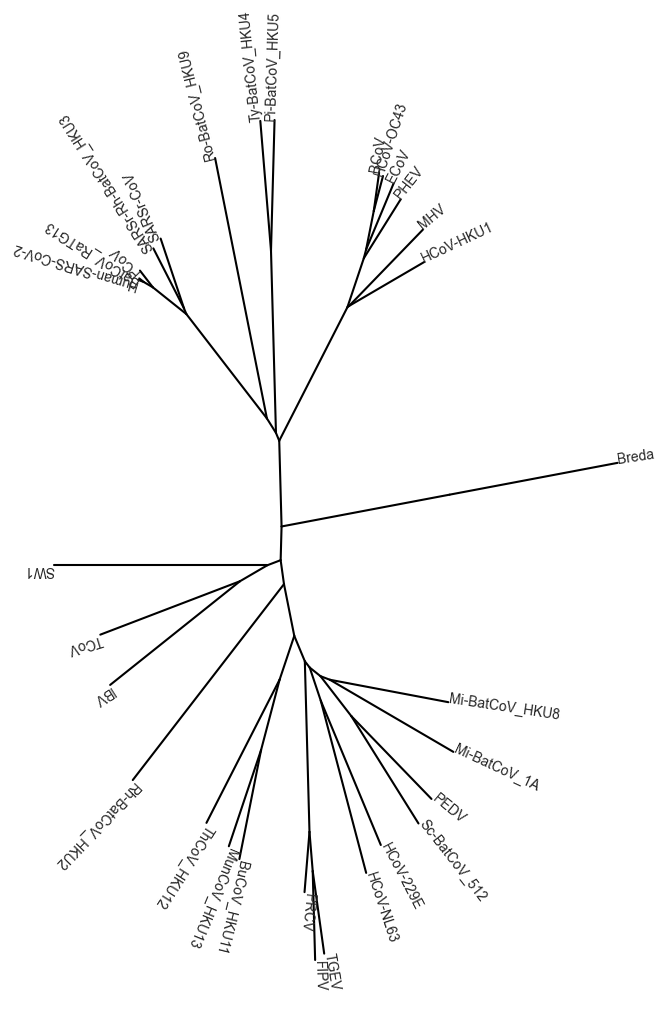

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 12))
ax.axis('off')
plot_nj_tree_radial(real_tree, ax)
# fig.savefig("radial_dendrogram.png", dpi=500, bbox_inches="tight")